In [13]:
import pandas as pd

df = pd.read_csv('grains/manual_vs_auto.csv')

print(df.head(5))

print(df.isnull().sum())


  Unnamed: 0   Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0       Set1  Image1    92.0     93.0         70         87         82
1       Set1  Image2    87.0     83.0         60         85         83
2       Set1  Image3   104.0     98.0         74         99         94
3       Set1  Image4    99.0      NaN         73        101        109
4       Set1  Image5    89.0      NaN         59         90         67
Unnamed: 0     0
Image          0
Manual         6
Manual2       97
Auto_th_2      0
Auto_th_3      0
Auto_th_4      0
dtype: int64


<AxesSubplot:title={'center':'Manual count'}, ylabel='Frequency'>

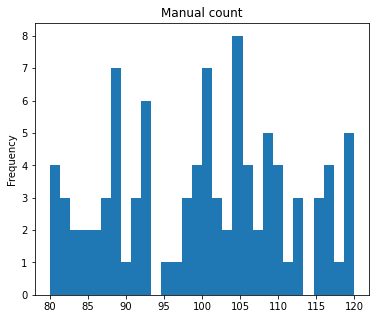

In [2]:
# plot histogram
# 'Manual' data

df['Manual'].plot(kind='hist', 
                  bins=30, 
                  title='Manual count', 
                  figsize=(6,5))

In [3]:
df = df.rename(columns={'Unnamed: 0': 'Image_set'})

print(df.head(5))

  Image_set   Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0      Set1  Image1    92.0     93.0         70         87         82
1      Set1  Image2    87.0     83.0         60         85         83
2      Set1  Image3   104.0     98.0         74         99         94
3      Set1  Image4    99.0      NaN         73        101        109
4      Set1  Image5    89.0      NaN         59         90         67


In [4]:
set1_df = df[df['Image_set']=='Set1']

print(set1_df.tail(5))

   Image_set    Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
20      Set1  Image21    89.0      NaN         65         94         86
21      Set1  Image22    88.0      NaN         66         96         83
22      Set1  Image23   106.0      NaN         71        112        105
23      Set1  Image24   107.0      NaN         92         91        111
24      Set1  Image25   108.0      NaN         93        113        115


<AxesSubplot:title={'center':'Manual count'}, ylabel='Frequency'>

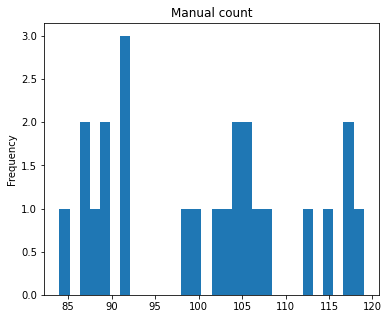

In [5]:
# plot only 'Manual' Set1 data

set1_df['Manual'].plot(kind='hist', 
                       bins=30, 
                       title='Manual count', 
                       figsize=(6,5))

<AxesSubplot:>

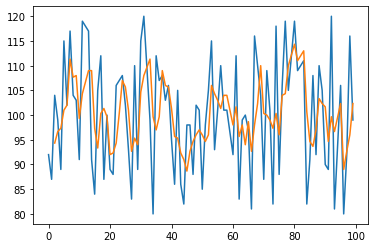

In [14]:
df = df.drop(columns=['Manual2'], axis=1)
df = df.dropna()

df['Manual'].plot()
df['Manual'].rolling(3).mean().plot()

In [7]:
print(df['Manual'].describe())

count     94.000000
mean     100.021277
std       11.285140
min       80.000000
25%       90.250000
50%      101.000000
75%      108.000000
max      120.000000
Name: Manual, dtype: float64


<AxesSubplot:>

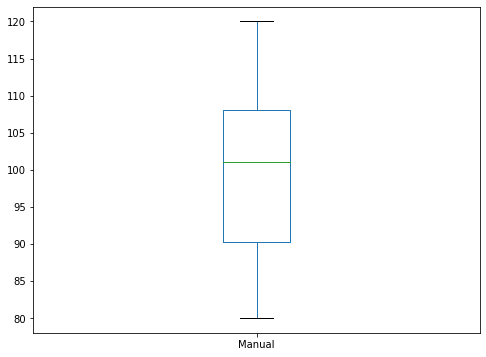

In [8]:
df['Manual'].plot(kind='box', 
                  figsize=(8,6))

<AxesSubplot:title={'center':'Manual vs Auto 2'}, xlabel='Manual', ylabel='Auto_th_2'>

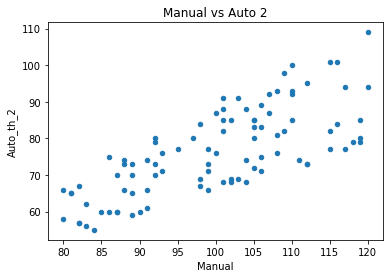

In [9]:
df.plot(kind='scatter', 
        x='Manual', 
        y='Auto_th_2',
        title='Manual vs Auto 2')

In [10]:
# Apply custumised function
# decide which images with more cells

def cell_count(x):
    if x<=100.0:
        return 'Low'
    else:
        return 'High'

# and store the result in new column 'cell_count_ndex'

df['cell_count_ndex'] = df['Manual'].apply(cell_count)

print(df.head(5))

  Image_set   Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4  \
0      Set1  Image1    92.0     93.0         70         87         82   
1      Set1  Image2    87.0     83.0         60         85         83   
2      Set1  Image3   104.0     98.0         74         99         94   
3      Set1  Image4    99.0      NaN         73        101        109   
4      Set1  Image5    89.0      NaN         59         90         67   

  cell_count_ndex  
0             Low  
1             Low  
2            High  
3             Low  
4             Low  


In [11]:
df.to_csv('grains/manual_vs_auto2.csv')

<AxesSubplot:title={'center':'Manual'}, xlabel='cell_count_ndex'>

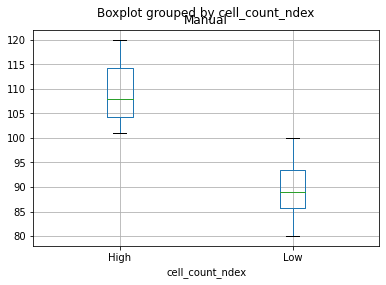

In [12]:
df.boxplot(column='Manual', 
           by='cell_count_ndex')